In [1]:
#| code-fold: true
#| code-summary: "Packages and plotting settings"
#| output: false
import os
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from copy import deepcopy
from matplotlib.colors import Normalize
import matplotlib
from matplotlib.ticker import ScalarFormatter
# import scienceplots
# plt.style.use(['science','ieee'])
# plt.style.use(['science','~/.config/matplotlib/stylelib/ingo.mpl'])
# plt.style.use('~/.config/matplotlib/stylelib/ingo.mplstyle')
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

# cm = plt.get_cmap('tab20')
# cm = plt.get_cmap('Dark2')
# for color in plt.cycler("color", cm.colors):
    # print(matplotlib.colors.to_hex(color['color']))

main_dir = os.getenv("SMS")
from code_11_ijshs import *

#### Fully resolved (OpenFOAM) simulation

In [2]:
#| code-fold: true
#| code-summary: "Test: Load VTK"
#| output: false

filename = os.path.join(main_dir, "outputs/nozzle_openfoam/VTK/nozzle_openfoam_0/internal.vtu")
# filename = os.path.join(main_dir, "outputs/nozzle_openfoam/VTK/nozzle_mid_600/boundary/outflow.vtp")

mesh_test, scalar_field_names = read_vtk(filename)
print(f'Available cell field: {scalar_field_names}')

Available cell field: ['alpha.water', 'epsilon', 'k', 'nuTilda', 'nut', 'p_rgh', 'U']


In [3]:
experiments = {}

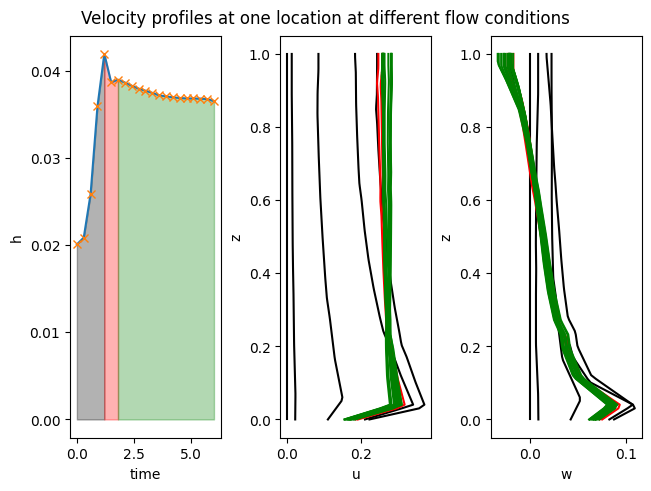

In [4]:
#| code-fold: true
#| code-summary: "Flow conditions at the beginning of the flow"
#| output: false

directory = os.path.join(main_dir, 'outputs/nozzle_openfoam/VTK')
pos, h, u, w, iteration = extract_1d_data(directory, pos=[0.3, 0, 0], stride=30)

fig, ax = plt.subplots(1, 3, constrained_layout=True)
fig.suptitle('Velocity profiles at one location at different flow conditions')
ax[0].set_xlabel('time')
ax[0].set_ylabel('h')
ax[1].set_xlabel('u')
ax[1].set_ylabel('z')
ax[2].set_xlabel('w')
ax[2].set_ylabel('z')

z = np.linspace(0, 1, 100)
dt = 0.01
time = dt * iteration

regions = [4,6]
ax[0].plot(time, h)
ax[0].plot(time, h, 'x')
ax[0].fill_between(time[:regions[0]+1], h[:regions[0]+1], color='k', alpha=0.3)
ax[0].fill_between(time[regions[0]:regions[1]+1], h[regions[0]:regions[1]+1], color='r', alpha=0.3)
ax[0].fill_between(time[regions[1]:], h[regions[1]:], color='g', alpha=0.3)
for i in range(u.shape[0]):
    if i <= regions[0]:
        ax[1].plot(u[i], z, 'k')
        ax[2].plot(w[i], z, 'k')
    elif i <= regions[1]:
        ax[1].plot(u[i], z, 'r')
        ax[2].plot(w[i], z, 'r')
    else:
        ax[1].plot(u[i], z, 'g')
        
        ax[2].plot(w[i], z, 'g')

experiments["0.3"] = {"pos": pos.copy(), "h": h.copy(), "u":u.copy(), "w": w.copy(), "timeline":time}

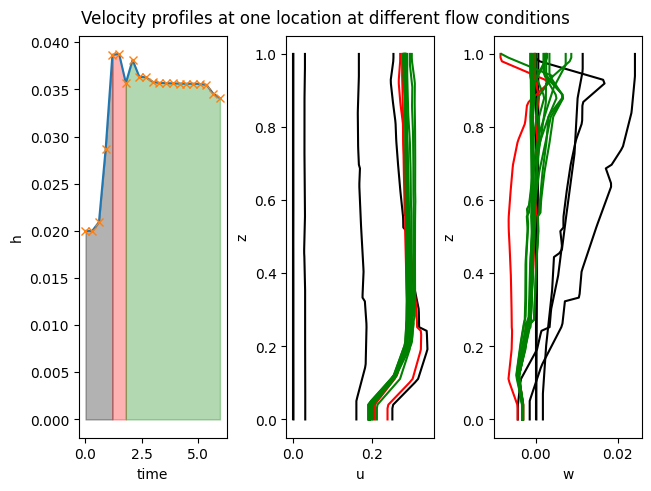

In [5]:
#| code-fold: true
#| code-summary: "Flow conditions at the beginning of the flow"
#| output: false

directory = os.path.join(main_dir, 'outputs/nozzle_openfoam/VTK')
pos, h, u, w, iteration = extract_1d_data(directory, pos=[0.4, 0, 0], stride=30)

fig, ax = plt.subplots(1, 3, constrained_layout=True)
fig.suptitle('Velocity profiles at one location at different flow conditions')
ax[0].set_xlabel('time')
ax[0].set_ylabel('h')
ax[1].set_xlabel('u')
ax[1].set_ylabel('z')
ax[2].set_xlabel('w')
ax[2].set_ylabel('z')

z = np.linspace(0, 1, 100)
dt = 0.01
time = dt * iteration

regions = [4,6]
ax[0].plot(time, h)
ax[0].plot(time, h, 'x')
ax[0].fill_between(time[:regions[0]+1], h[:regions[0]+1], color='k', alpha=0.3)
ax[0].fill_between(time[regions[0]:regions[1]+1], h[regions[0]:regions[1]+1], color='r', alpha=0.3)
ax[0].fill_between(time[regions[1]:], h[regions[1]:], color='g', alpha=0.3)
for i in range(u.shape[0]):
    if i <= regions[0]:
        ax[1].plot(u[i], z, 'k')
        ax[2].plot(w[i], z, 'k')
    elif i <= regions[1]:
        ax[1].plot(u[i], z, 'r')
        ax[2].plot(w[i], z, 'r')
    else:
        ax[1].plot(u[i], z, 'g')
        
        ax[2].plot(w[i], z, 'g')
experiments["0.4"] = {"pos": pos.copy(), "h": h.copy(), "u":u.copy(), "w": w.copy(), "timeline":time}

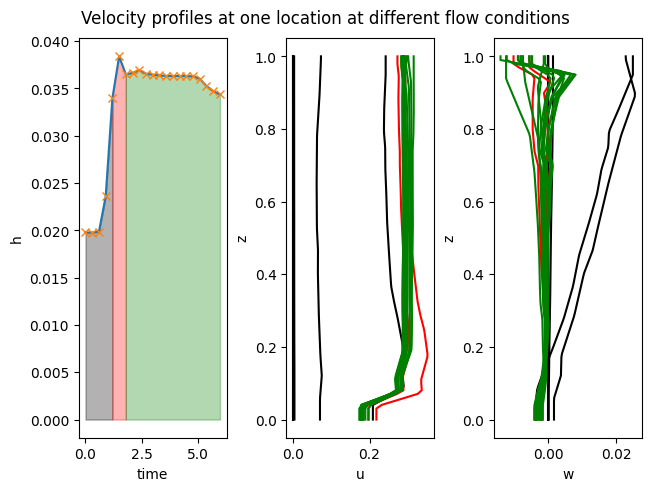

In [6]:
#| code-fold: true
#| code-summary: "Flow conditions at the beginning of the flow"
#| output: false

directory = os.path.join(main_dir, 'outputs/nozzle_openfoam/VTK')
pos, h, u, w, iteration = extract_1d_data(directory, pos=[0.5, 0, 0], stride=30)

fig, ax = plt.subplots(1, 3, constrained_layout=True)
fig.suptitle('Velocity profiles at one location at different flow conditions')
ax[0].set_xlabel('time')
ax[0].set_ylabel('h')
ax[1].set_xlabel('u')
ax[1].set_ylabel('z')
ax[2].set_xlabel('w')
ax[2].set_ylabel('z')

z = np.linspace(0, 1, 100)
dt = 0.01
time = dt * iteration

regions = [4,6]
ax[0].plot(time, h)
ax[0].plot(time, h, 'x')
ax[0].fill_between(time[:regions[0]+1], h[:regions[0]+1], color='k', alpha=0.3)
ax[0].fill_between(time[regions[0]:regions[1]+1], h[regions[0]:regions[1]+1], color='r', alpha=0.3)
ax[0].fill_between(time[regions[1]:], h[regions[1]:], color='g', alpha=0.3)
for i in range(u.shape[0]):
    if i <= regions[0]:
        ax[1].plot(u[i], z, 'k')
        ax[2].plot(w[i], z, 'k')
    elif i <= regions[1]:
        ax[1].plot(u[i], z, 'r')
        ax[2].plot(w[i], z, 'r')
    else:
        ax[1].plot(u[i], z, 'g')
        
        ax[2].plot(w[i], z, 'g')
experiments["0.5"] = {"pos": pos.copy(), "h": h.copy(), "u":u.copy(), "w": w.copy(), "timeline":time}

[1, 1 - 2*x, 3*(2*x - 1)**2/2 - 1/2, 3*x - 5*(2*x - 1)**3/2 - 3/2, 35*(2*x - 1)**4/8 - 15*(2*x - 1)**2/4 + 3/8, -15*x/4 - 63*(2*x - 1)**5/8 + 35*(2*x - 1)**3/4 + 15/8, 231*(2*x - 1)**6/16 - 315*(2*x - 1)**4/16 + 105*(2*x - 1)**2/16 - 5/16, 35*x/8 - 429*(2*x - 1)**7/16 + 693*(2*x - 1)**5/16 - 315*(2*x - 1)**3/16 - 35/16, 6435*(2*x - 1)**8/128 - 3003*(2*x - 1)**6/32 + 3465*(2*x - 1)**4/64 - 315*(2*x - 1)**2/32 + 35/128]
Moments: [ 0.30149559 -0.03238433 -0.03788736 -0.03705101 -0.02858277 -0.01659975
 -0.00705966  0.0020789   0.00816144]
errors: [0.000993493712794901, 0.0006437860026421573, 0.0003565105146569219, 0.00016043789681463366, 7.006789794334368e-05, 4.557221388455965e-05, 4.210695932139605e-05, 4.1691238644273394e-05, 3.727392592820117e-05]
relative errors: [1.0, 1.5432048983940487, 2.786716441592087, 6.192388036242842, 14.179014098556685, 21.800426797599737, 23.594525199782627, 23.82979602193625, 26.653852205120984]


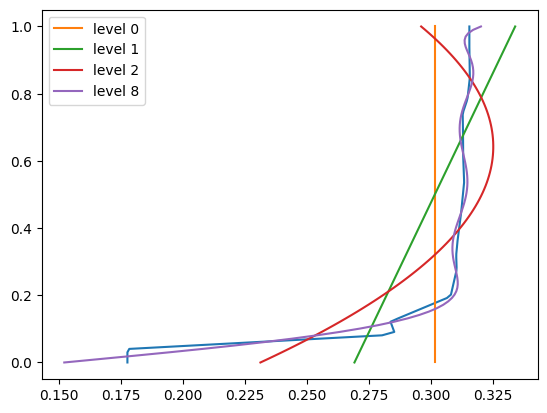

In [7]:
from library.model.model import *
level = 8
basis_analytical =Legendre_shifted(order=level+1)
basis_readable = [basis_analytical.get(k) for k in range(level+1)]
basis = [basis_analytical.get_lambda(k) for k in range(level+1)]
print(basis_readable)

u_test = u[-1]
moments = project_to_smm(u_test, z, basis=basis)
print(f'Moments: {moments}')
reconstructions = []
for k in range(level+1):
    reconst = moments[0] * basis[0](z)
    for i in range(1,k+1):
        reconst += moments[i] * basis[i](z)
    reconstructions.append(reconst)

errors = []
rel_errors = []
error_0 = np.trapz((u_test - reconstructions[0])**2, z)
for k in range(level+1):
    error = np.trapz((u_test - reconstructions[k])**2, z)
    errors.append(error)
    rel_errors.append(error_0/error)


fig, ax = plt.subplots()
plt.plot(u_test, z)
# for k in range(level+1):
#     ax.plot(reconstructions[k], z, label=f'level {k}')

for k in [0, 1, 2, 8]:
    ax.plot(reconstructions[k], z, label=f'level {k}')

plt.legend()

print(f'errors: {errors}')
print(f'relative errors: {rel_errors}')

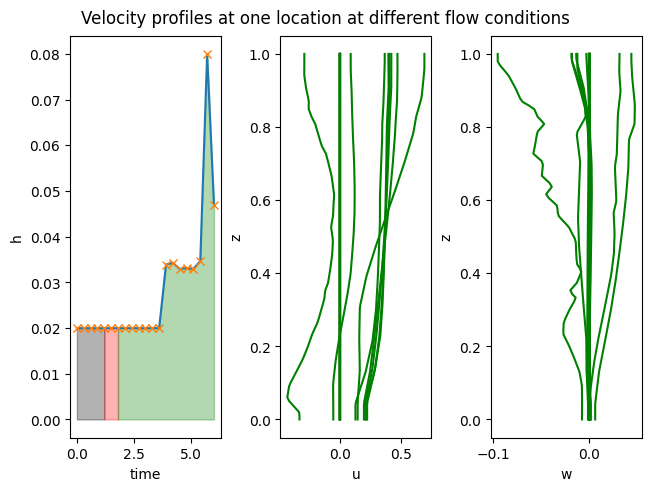

In [8]:
#| code-fold: true
#| code-summary: "Flow conditons at the end of the channel"
#| output: true

directory = os.path.join(main_dir, 'outputs/nozzle_openfoam/VTK')
pos, h, u, w, iteration = extract_1d_data(directory, pos=[2.5, 0, 0], stride=30)

fig, ax = plt.subplots(1, 3, constrained_layout=True)
fig.suptitle('Velocity profiles at one location at different flow conditions')
ax[0].set_xlabel('time')
ax[0].set_ylabel('h')
ax[1].set_xlabel('u')
ax[1].set_ylabel('z')
ax[2].set_xlabel('w')
ax[2].set_ylabel('z')

z = np.linspace(0, 1, 100)
dt = 0.01
time = dt * iteration

regions = [4,6]
ax[0].plot(time, h)
ax[0].plot(time, h, 'x')
ax[0].fill_between(time[:regions[0]+1], h[:regions[0]+1], color='k', alpha=0.3)
ax[0].fill_between(time[regions[0]:regions[1]+1], h[regions[0]:regions[1]+1], color='r', alpha=0.3)
ax[0].fill_between(time[regions[1]:], h[regions[1]:], color='g', alpha=0.3)
for i in range(u.shape[0]):
    if i <= regions[0]:
        ax[1].plot(u[i], z, 'k')
        ax[2].plot(w[i], z, 'k')
    elif i <= regions[1]:
        ax[1].plot(u[i], z, 'r')
        ax[2].plot(w[i], z, 'r')
    else:
        ax[1].plot(u[i], z, 'g')
        
        ax[2].plot(w[i], z, 'g')
experiments["2.5"] = {"pos": pos.copy(), "h": h.copy(), "u":u.copy(), "w": w.copy(), "timeline":time}

#### Depth-averaged (Shallow Moment) simulation

In [9]:
#| code-fold: true
#| code-summary: "Imports"
%load_ext autoreload
%autoreload 2

import numpy as np
import pytest
from types import SimpleNamespace

from library.model.model import *
from library.pysolver.solver import *
import library.model.initial_conditions as IC
import library.model.boundary_conditions as BC
from library.pysolver.ode import RK1
import library.misc.io as io
from library.pysolver.reconstruction import GradientMesh
import library.mesh.mesh as petscMesh
import library.postprocessing.postprocessing as postprocessing
import argparse


In [10]:
#| code-fold: true
#| code-summary: "Mesh"
#| output: false
mesh = petscMesh.Mesh.create_1d((0.5, 3.0), 100)


In [11]:
#| code-summary: "Generate boundary data"
#| code-fold: true
#| output: false 

def project_openfoam_to_smm(directory, pos=[0.5, 0, 0], stride=60, dt=0.01, level=10, output_uw=False):
    pos, h, u, w, iteration = extract_1d_data(directory, pos=pos, stride=stride)
    iteration_times = dt * iteration
    basis_analytical =Legendre_shifted(order=level+1)
    basis = [basis_analytical.get_lambda(k) for k in range(level+1)]

    moments = []
    moments_w = []
    z = np.linspace(0, 1, u.shape[1])
    for u_n in u:
        moments.append(project_to_smm(u_n, z, basis=basis))
    for w_n in w:
        moments_w.append(project_to_smm(w_n, z, basis=basis))
    moments = np.array(moments)
    moments_w = np.array(moments_w)
    if output_uw:
        return h, moments, moments_w, iteration_times, u, w
    return h, moments, moments_w, iteration_times


/home/ingo/Git/SMM/shallow-moments-simulation/docs/problems/code_11_ijshs.py:110: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  nominator, error = quad(lambda z: u_spline(z) * b(z), z[0], z[-1])


inflow moments: [ 0.00499595  0.00033276 -0.00023573 -0.00107404 -0.00104976 -0.00074871
 -0.00023724  0.00016696  0.000237    0.0003143   0.00031262]
errors: [0.00038518535014092376, 0.0002916392682002062, 0.0002819707709113532, 0.00015802608328654354, 6.833372722751012e-05, 3.0551360181908725e-05, 2.7537461287689975e-05, 2.588418877436852e-05, 2.3053530259131056e-05]
relative errors: [1.0, 1.3207595551793099, 1.3660470867103438, 2.437479573814911, 5.636826290163988, 12.607797094710529, 13.987685579175468, 14.881105739823244, 16.708302191086734]


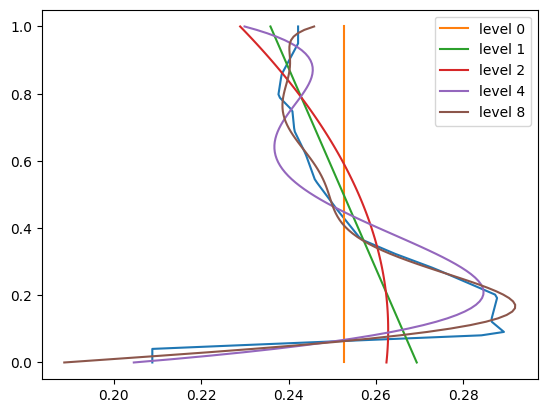

In [12]:
from library.model.model import *

h_inflow ,moments_inflow, moments_w_inflow, timeline_inflow, u_inflow, w_inflow = project_openfoam_to_smm(directory, pos=[0.5, 0, 0], stride=60, output_uw=True)
level = 8
basis_analytical =Legendre_shifted(order=level+1)
basis_readable = [basis_analytical.get(k) for k in range(level+1)]
basis = [basis_analytical.get_lambda(k) for k in range(level+1)]

moments = moments_inflow[2]
print(f'inflow moments: {moments * h_inflow}')
u_test = u_inflow[2]

reconstructions = []
for k in range(level+1):
    reconst = moments[0] * basis[0](z)
    for i in range(1,k+1):
        reconst += moments[i] * basis[i](z)
    reconstructions.append(reconst)

errors = []
rel_errors = []
error_0 = np.trapz((u_test - reconstructions[0])**2, z)
for k in range(level+1):
    error = np.trapz((u_test - reconstructions[k])**2, z)
    errors.append(error)
    rel_errors.append(error_0/error)


fig, ax = plt.subplots()
plt.plot(u_test, z)
# for k in range(level+1):
#     ax.plot(reconstructions[k], z, label=f'level {k}')

for k in [0, 1, 2, 4, 8]:
    ax.plot(reconstructions[k], z, label=f'level {k}')

plt.legend()

print(f'errors: {errors}')
print(f'relative errors: {rel_errors}')

In [138]:
#| code-summary: "Model"
#| code-fold: true
level = 2
offset = level+1

### MIXED BOUNDARY CONDITIONS

data_dict = {}
data_dict[0] = h_inflow 
for i in range(level+1):
    data_dict[1+i] = h_inflow * moments_inflow[:, i]
# data_dict[1] = h_inflow * np.sqrt((moments_inflow[:, 0]**2 + moments_w_inflow[:, 0]**2))
data_dict[2] = h_inflow * moments_inflow[:, 1]
# for i in range(2, level+1):
#     data_dict[i] = np.zeros_like(h_inflow)

bcs = BC.BoundaryConditions(
    [
        BC.FromData(physical_tag='left', prescribe_fields=data_dict, timeline=timeline_inflow),
        BC.Wall(physical_tag="right", momentum_field_indices=[[i+1] for i in range(level+1)], wall_slip=0.),
    ]
)



ic = IC.Constant(
    constants=lambda n_fields: np.array(
        [0.02, 0.0] + [0.0 for i in range(n_fields - 2)]
    )
)

# def custom_ic(x):
#     Q = np.zeros(3+2*level, dtype=float)
#     Q[0] = 2*np.ones_like(x[0])
#     Q[1] = x[0]
#     Q[2] = x[1]
#     Q[3] = x[0]**2 
#     Q[4] = x[1]**2 
#     return Q

# ic = IC.UserFunction(custom_ic)


settings = Settings(
    name="ShallowMoments",
    parameters={"g": 9.81, "C": 30.0, "nu": 1.034*10**(-6), "rho": 1, "lamda": 3, "beta": 0.0100},
    reconstruction=recon.constant,
    num_flux=flux.LLF(),
    nc_flux=nonconservative_flux.segmentpath(3),
    compute_dt=timestepping.adaptive(CFL=.9),
    time_end=6.,
    output_snapshots=2000,
    output_clean_dir=True,
    output_dir="outputs/output_ijshs",
)


model = ShallowMoments(
    dimension=1,
    fields=2 + level,
    aux_fields=0,
    parameters=settings.parameters,
    boundary_conditions=bcs,
    initial_conditions=ic,
    # settings={"friction": []},
    # settings={"friction": ["newtonian"]},
    # settings={"friction": ["chezy"]},
    # settings={"friction": ["shear"]},
    settings={"friction": ["shear_crazy"]},
    # settings={"friction": ["shear", "newtonian"]},
    # settings={"friction": ["chezy", "newtonian"]},
    basis=Basis(basis=Legendre_shifted(order=level)),
)




In [139]:
#| code-fold: true
#| code-summary: "Simulation"
#| output: false
jax_fvm_unsteady_semidiscrete(
    mesh, model, settings, ode_solver_flux=RK1, ode_solver_source=RKimplicit
)
# try:
#     jax_fvm_unsteady_semidiscrete(
#         mesh, model, settings, ode_solver_flux=RK1, ode_solver_source=RKimplicit
#     )
# except Exception as e:
    # print(f"Error \n {e}")
# io.generate_vtk(os.path.join(settings.output_dir, f'{settings.name}.h5'))
# postprocessing.recover_3d_from_smm_as_vtk(
#     model,
#     settings.output_dir,
#     os.path.join(settings.output_dir, "mesh.hdf5"),
#     os.path.join(settings.output_dir, "fields.hdf5"),
#     Nz=10,
#     start_at_time=1.0,
# )

1 0.05079640961089473 0.05079640961089473
2 0.1014658421068877 0.050669432495992955
3 0.1521231228583693 0.0506572807514816
4 0.20278263821732068 0.05065951535895139
5 0.2534460121156246 0.05066337389830393
6 0.3041113955440397 0.05066538342841508
7 0.3547772176106222 0.05066582206658247
8 0.4054439574543207 0.050666739843698516
9 0.4561120716486553 0.050668114194334604
10 0.506781985257278 0.05066991360862269
11 0.5574540859318132 0.050672100674535196
12 0.6081269131721201 0.050672827240306806
13 0.6587653018576174 0.0506383886854973
14 0.7084932133360049 0.04972791147838746
15 0.7536032184648136 0.045110005128808736
16 0.7952337700605432 0.04163055159572958
17 0.8343313627129822 0.0390975926524391
18 0.8714767868690219 0.037145424156039566
19 0.9070486165092742 0.03557182964025226
20 0.9413117989465627 0.03426318243728855
21 0.9744615178464217 0.03314971889985897
22 1.0066470417421791 0.03218552389575737
23 1.0379858435307405 0.0313388017885614
24 1.068572505889473 0.0305866623587325

AssertionError: 

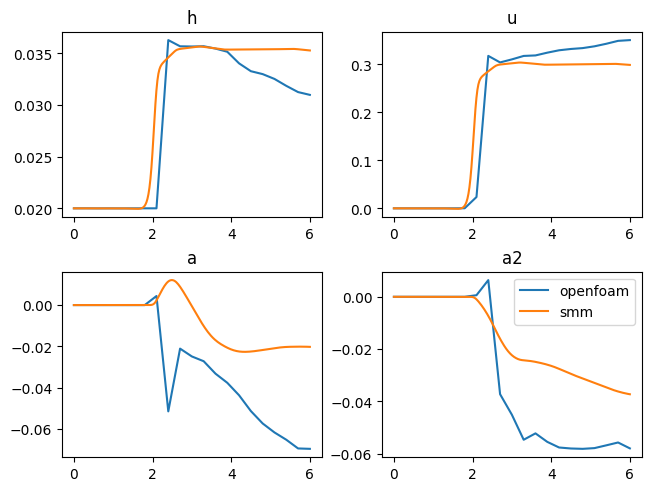

In [ ]:

x_smm, Q_smm, Qaux_smm, timeline_smm = io.load_timeline_of_fields_from_hdf5(os.path.join(settings.output_dir, "ShallowMoments.h5" ))
i_pos = ((x_smm-pos)**2).argmin()
h_smm = Q_smm[:, 0, i_pos]
u_smm = Q_smm[:, 1, i_pos]/h_smm
a_smm = Q_smm[:, 2, i_pos]/h_smm
try:
    a2_smm = Q_smm[:, 3, i_pos]/h_smm
except:
    a2_smm = Q_smm[:, 2, i_pos]/h_smm

fig, ax = plt.subplots(2, 2, constrained_layout=True)
ax[0, 0].plot(timeline_openfoam, h_openfoam, label='openfoam')
ax[0, 0].plot(timeline_smm, h_smm, label='smm')
ax[0, 0].set_title('h')
ax[0, 1].plot(timeline_openfoam, mom_u_openfoam, label='openfoam')
ax[0, 1].plot(timeline_smm, u_smm, label='smm')
ax[0, 1].set_title('u')
ax[1, 0].plot(timeline_openfoam, mom_a_openfoam, label='openfoam')
ax[1, 0].plot(timeline_smm, a_smm, label='smm')
ax[1, 0].set_title('a')
ax[1, 1].plot(timeline_openfoam, mom_a2_openfoam, label='openfoam')
ax[1, 1].plot(timeline_smm, a2_smm, label='smm')
ax[1, 1].set_title('a2')
plt.legend()

# Compare the water height of OpenFOAM and SMM at a meauring location

In [ ]:
pos = 0.5
# h_openfoam = experiments[str(pos)]["h"]
# timeline_openfoam = experiments[str(pos)]["timeline"]
h_openfoam, moments_openfoam, moments_w_openfoam, timeline_openfoam, u_openfoam, w_openfoam = project_openfoam_to_smm(directory, pos=[pos, 0, 0], stride=30, output_uw = True)
mom_u_openfoam = moments_openfoam[:, 0]
mom_a_openfoam = moments_openfoam[:, 1]
mom_a2_openfoam = moments_openfoam[:, 2]


In [ ]:

x_smm, Q_smm, Qaux_smm, timeline_smm = io.load_timeline_of_fields_from_hdf5(os.path.join(settings.output_dir, "ShallowMoments.h5" ))
i_pos = ((x_smm-pos)**2).argmin()
h_smm = Q_smm[:, 0, i_pos]
u_smm = Q_smm[:, 1, i_pos]/h_smm
a_smm = Q_smm[:, 2, i_pos]/h_smm
try:
    a2_smm = Q_smm[:, 3, i_pos]/h_smm
except:
    a2_smm = Q_smm[:, 2, i_pos]/h_smm

fig, ax = plt.subplots(2, 2, constrained_layout=True)
ax[0, 0].plot(timeline_openfoam, h_openfoam, label='openfoam')
ax[0, 0].plot(timeline_smm, h_smm, label='smm')
ax[0, 0].set_title('h')
ax[0, 1].plot(timeline_openfoam, mom_u_openfoam, label='openfoam')
ax[0, 1].plot(timeline_smm, u_smm, label='smm')
ax[0, 1].set_title('u')
ax[1, 0].plot(timeline_openfoam, mom_a_openfoam, label='openfoam')
ax[1, 0].plot(timeline_smm, a_smm, label='smm')
ax[1, 0].set_title('a')
ax[1, 1].plot(timeline_openfoam, mom_a2_openfoam, label='openfoam')
ax[1, 1].plot(timeline_smm, a2_smm, label='smm')
ax[1, 1].set_title('a2')
plt.legend()

In [25]:
pos = 1.2
# h_openfoam = experiments[str(pos)]["h"]
# timeline_openfoam = experiments[str(pos)]["timeline"]
h_openfoam, moments_openfoam, moments_w_openfoam, timeline_openfoam, u_openfoam, w_openfoam = project_openfoam_to_smm(directory, pos=[pos, 0, 0], stride=30, output_uw = True)
mom_u_openfoam = moments_openfoam[:, 0]
mom_a_openfoam = moments_openfoam[:, 1]
mom_a2_openfoam = moments_openfoam[:, 2]


/home/ingo/Git/SMM/shallow-moments-simulation/docs/problems/code_11_ijshs.py:110: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  nominator, error = quad(lambda z: u_spline(z) * b(z), z[0], z[-1])


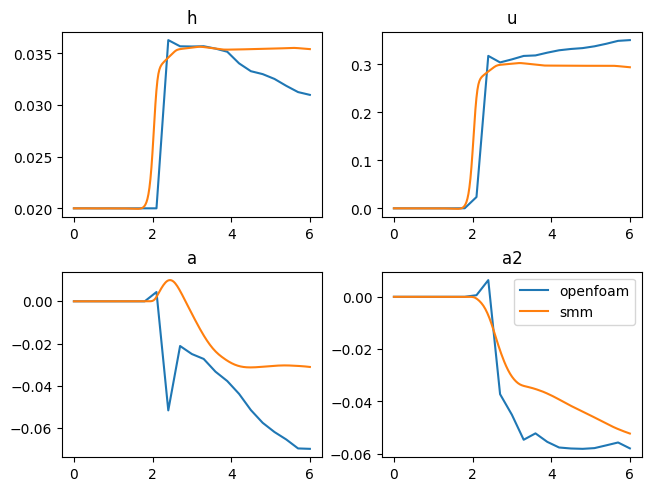

In [26]:
x_smm, Q_smm, Qaux_smm, timeline_smm = io.load_timeline_of_fields_from_hdf5(os.path.join(settings.output_dir, "ShallowMoments.h5" ))
i_pos = ((x_smm-pos)**2).argmin()
h_smm = Q_smm[:, 0, i_pos]
u_smm = Q_smm[:, 1, i_pos]/h_smm
a_smm = Q_smm[:, 2, i_pos]/h_smm
try:
    a2_smm = Q_smm[:, 3, i_pos]/h_smm
except:
    a2_smm = Q_smm[:, 2, i_pos]/h_smm

fig, ax = plt.subplots(2, 2, constrained_layout=True)
ax[0, 0].plot(timeline_openfoam, h_openfoam, label='openfoam')
ax[0, 0].plot(timeline_smm, h_smm, label='smm')
ax[0, 0].set_title('h')
ax[0, 1].plot(timeline_openfoam, mom_u_openfoam, label='openfoam')
ax[0, 1].plot(timeline_smm, u_smm, label='smm')
ax[0, 1].set_title('u')
ax[1, 0].plot(timeline_openfoam, mom_a_openfoam, label='openfoam')
ax[1, 0].plot(timeline_smm, a_smm, label='smm')
ax[1, 0].set_title('a')
ax[1, 1].plot(timeline_openfoam, mom_a2_openfoam, label='openfoam')
ax[1, 1].plot(timeline_smm, a2_smm, label='smm')
ax[1, 1].set_title('a2')
plt.legend()

In [ ]:
pos = 2.5
# h_openfoam = experiments[str(pos)]["h"]
# timeline_openfoam = experiments[str(pos)]["timeline"]
h_openfoam, moments_openfoam, moments_w_openfoam, timeline_openfoam, u_openfoam, w_openfoam = project_openfoam_to_smm(directory, pos=[pos, 0, 0], stride=30, output_uw = True)
mom_u_openfoam = moments_openfoam[:, 0]
mom_a_openfoam = moments_openfoam[:, 1]
mom_a2_openfoam = moments_openfoam[:, 2]



In [ ]:
x_smm, Q_smm, Qaux_smm, timeline_smm = io.load_timeline_of_fields_from_hdf5(os.path.join(settings.output_dir, "ShallowMoments.h5" ))
i_pos = ((x_smm-pos)**2).argmin()
h_smm = Q_smm[:, 0, i_pos]
u_smm = Q_smm[:, 1, i_pos]/h_smm
a_smm = Q_smm[:, 2, i_pos]/h_smm
try:
    a2_smm = Q_smm[:, 3, i_pos]/h_smm
except:
    a2_smm = Q_smm[:, 2, i_pos]/h_smm

fig, ax = plt.subplots(2, 2, constrained_layout=True)
ax[0, 0].plot(timeline_openfoam, h_openfoam, label='openfoam')
ax[0, 0].plot(timeline_smm, h_smm, label='smm')
ax[0, 0].set_title('h')
ax[0, 1].plot(timeline_openfoam, mom_u_openfoam, label='openfoam')
ax[0, 1].plot(timeline_smm, u_smm, label='smm')
ax[0, 1].set_title('u')
ax[1, 0].plot(timeline_openfoam, mom_a_openfoam, label='openfoam')
ax[1, 0].plot(timeline_smm, a_smm, label='smm')
ax[1, 0].set_title('a')
ax[1, 1].plot(timeline_openfoam, mom_a2_openfoam, label='openfoam')
ax[1, 1].plot(timeline_smm, a2_smm, label='smm')
ax[1, 1].set_title('a2')
plt.legend()